## Principles and Applications of Data Science (Spring 2022)
## Homework 2
## Due: Jun 15, 2022

### Name: 廖昱翔
### Student ID Number: 109598061

### *** 讀取檔案及準備對照表的字典物件 ***

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

## Picture of [Single Year Dataset] 

In [2]:
def generate_Histogram_picture_force_year( years_of_list, year_of_dataset_pathList ):
    for i in range(len(year_of_dataset_pathList)):        
        # 讀取資料集和資料集年份
        dataset = pd.read_csv( year_of_dataset_pathList[i] )
        dataset_years =  years_of_list[i]
        
        # 生成6張長條圖
        single_picture_data_preprocessing(dataset, dataset_years, "Month", "death_toll", 0, isTop10=False)
        single_picture_data_preprocessing(dataset, dataset_years, "Month", "Injuries_Person", 1, isTop10=False)
        single_picture_data_preprocessing(dataset, dataset_years, "Vehicle_type", "Injuries_Person", 2, isTop10=True)
        single_picture_data_preprocessing(dataset, dataset_years, "Weather", "Injuries_Person", 3, isTop10=False)
        single_picture_data_preprocessing(dataset, dataset_years, "Road_pattern", "Injuries_Person", 4, isTop10=True)
        single_picture_data_preprocessing(dataset, dataset_years, "Accident_location", "Injuries_Person", 5, isTop10=True)
        
        # 展示長條圖
        plt.show()
        
def single_picture_data_preprocessing(dataset, year_of_dataset, rowName, columnName, pltIndex, isTop10):
    if(isTop10):
        processed_dataset = dataset.groupby(by=[rowName]).sum().sort_values(by=[columnName],ascending=False).head(10).reset_index()
    else:
        processed_dataset = dataset.groupby(by=[rowName]).sum().sort_values(by=[columnName],ascending=False).reset_index()
    plt.sca(axes_force_year[ pltIndex ]);
    x = np.arange( len(processed_dataset[rowName]) )
    plt.bar( x, processed_dataset[columnName] , color="orange")
    plt.xticks( x, processed_dataset[rowName] )
    plt.xlabel( rowName )
    plt.ylabel( columnName )
    if(isTop10):
        plt.title( year_of_dataset+ " " + columnName + "(TOP 10 " + rowName + ")")
    else:
        plt.title( year_of_dataset+ " " + columnName + "(" + rowName + ")")

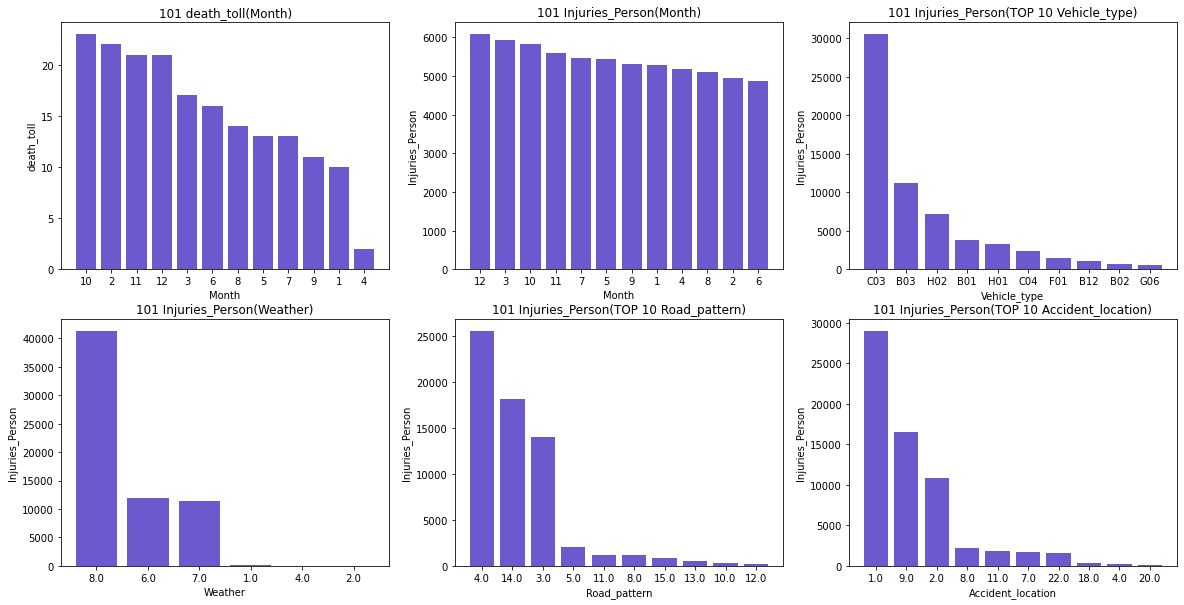

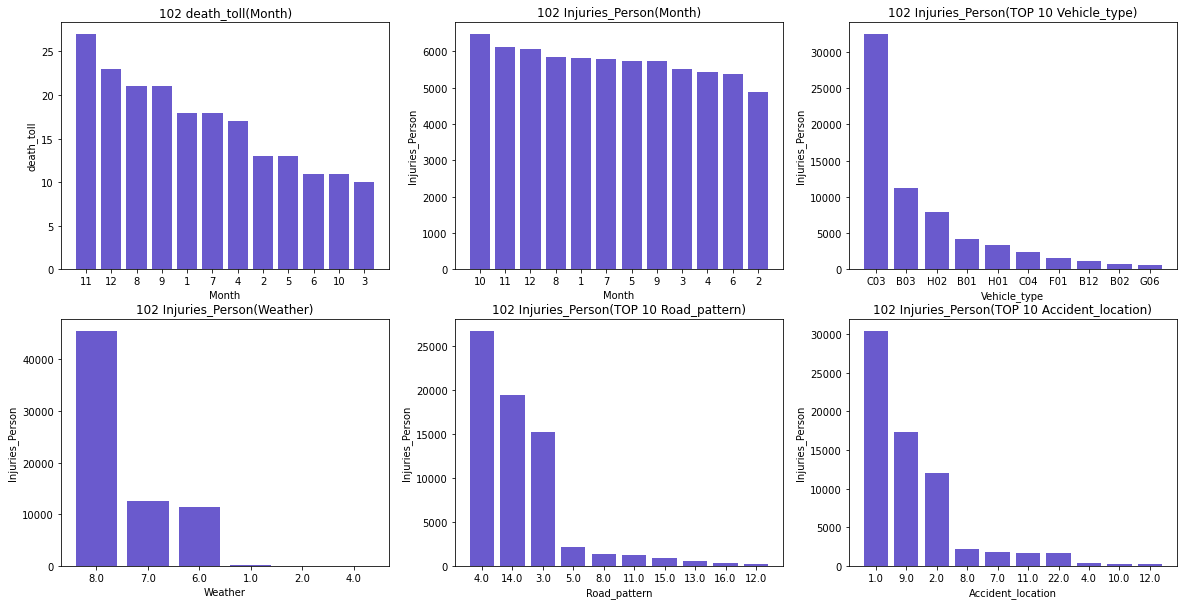

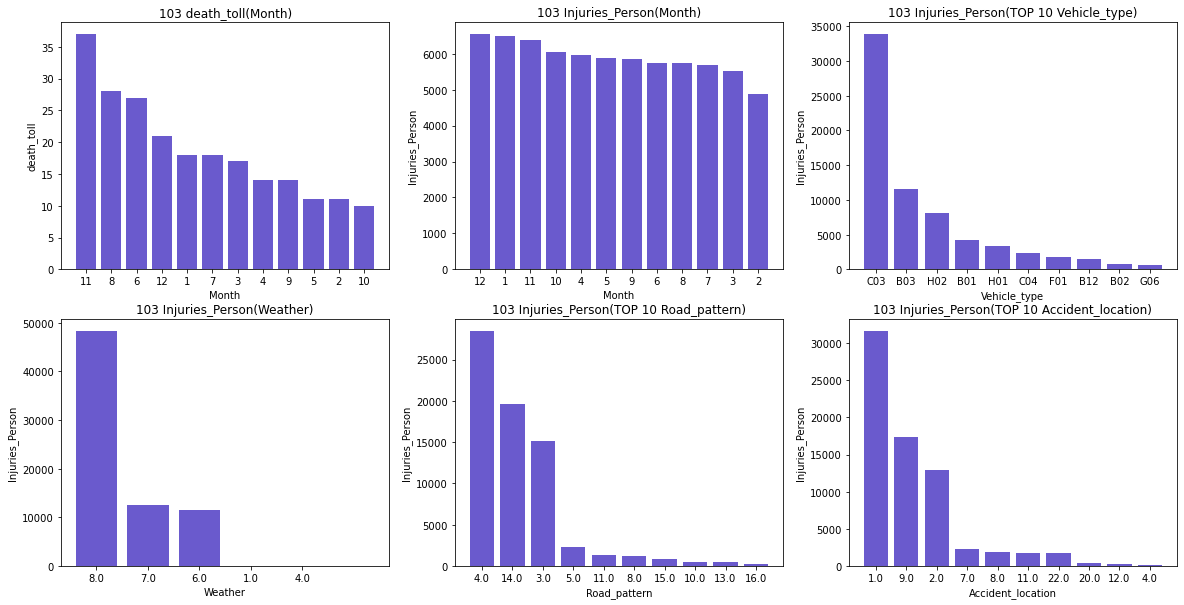

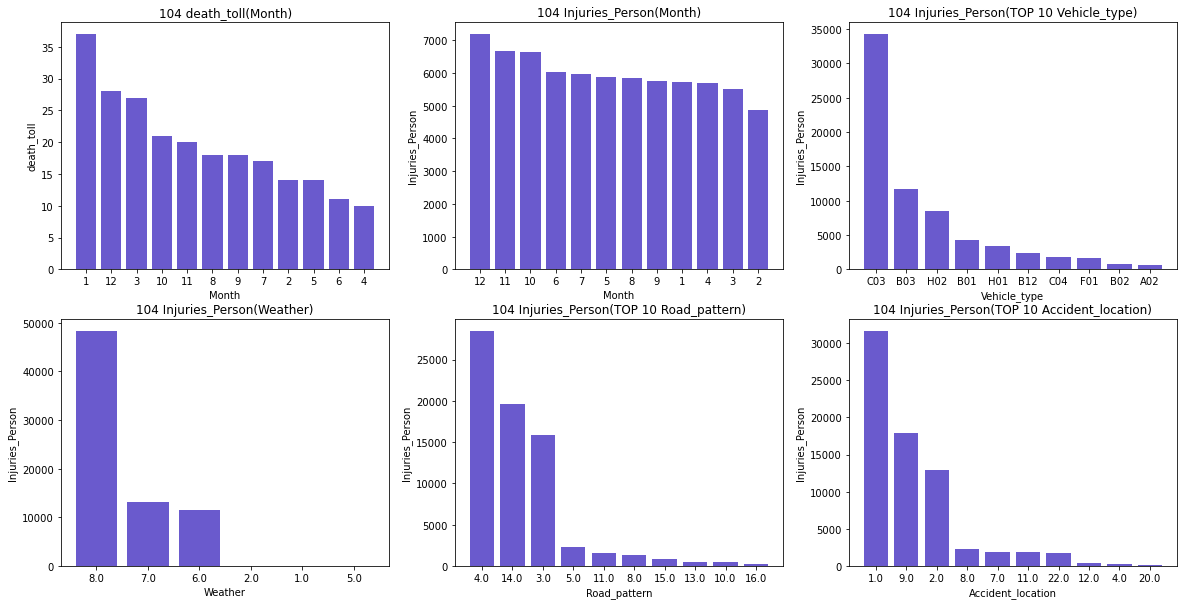

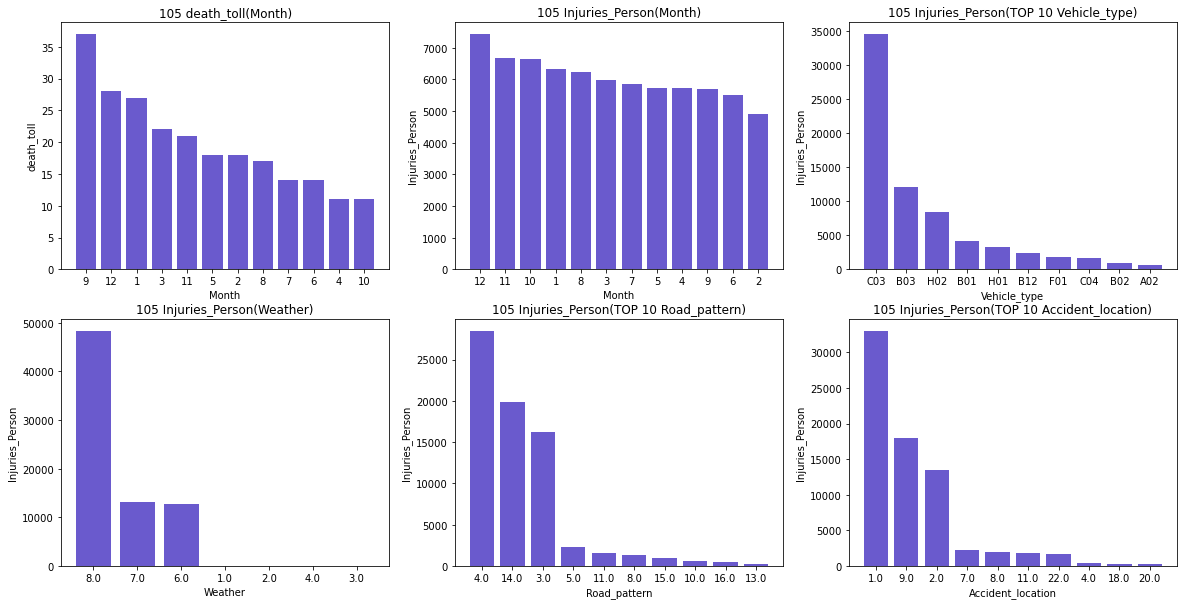

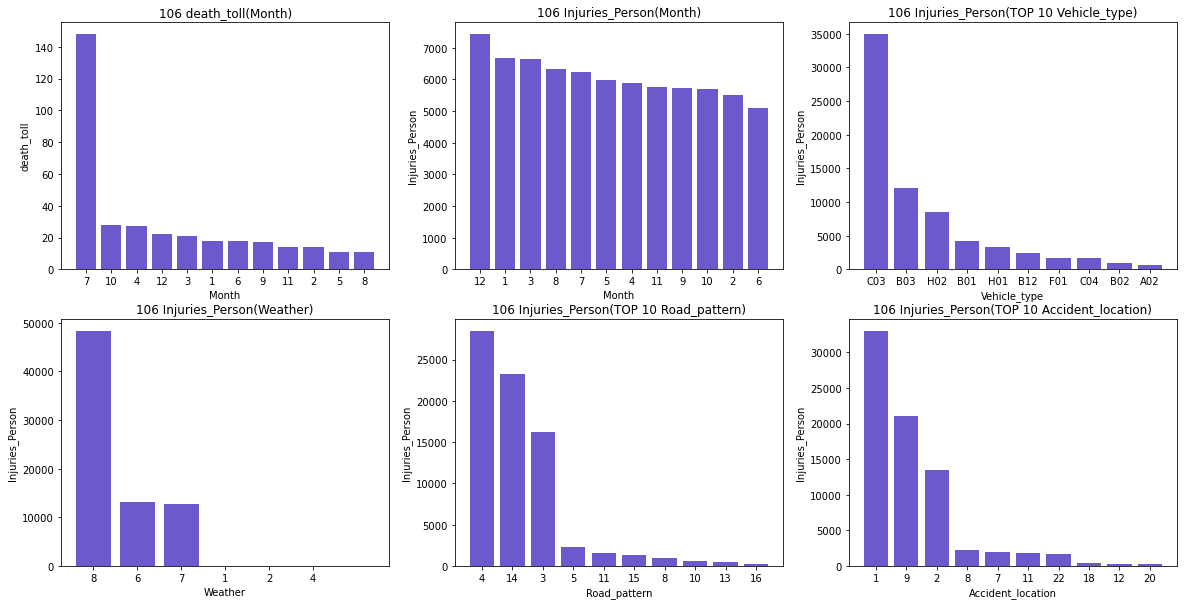

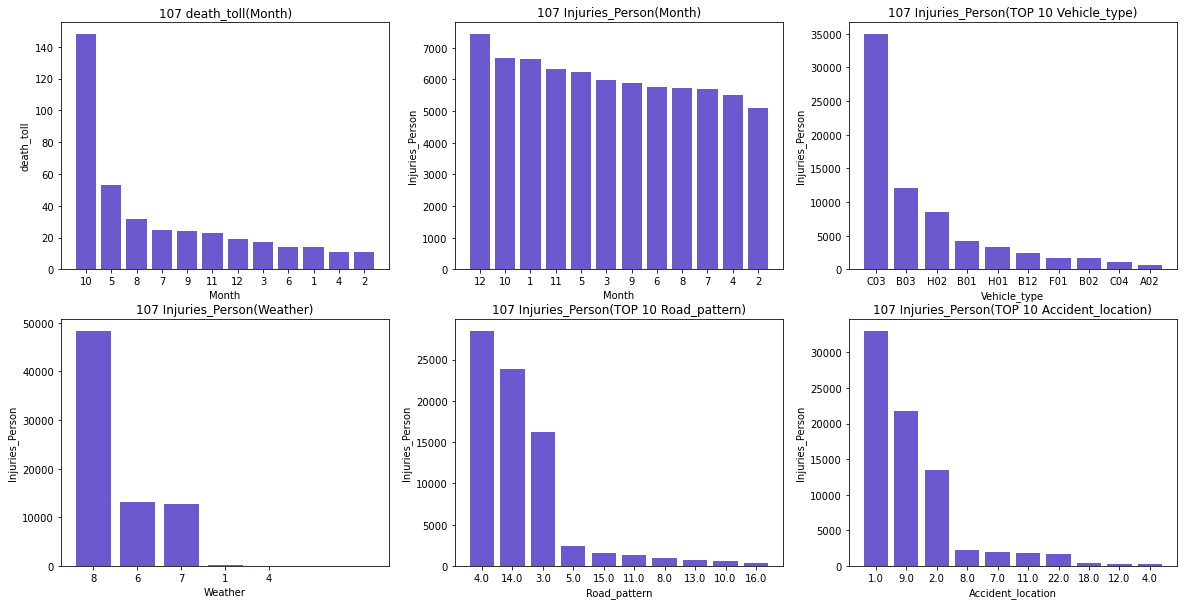

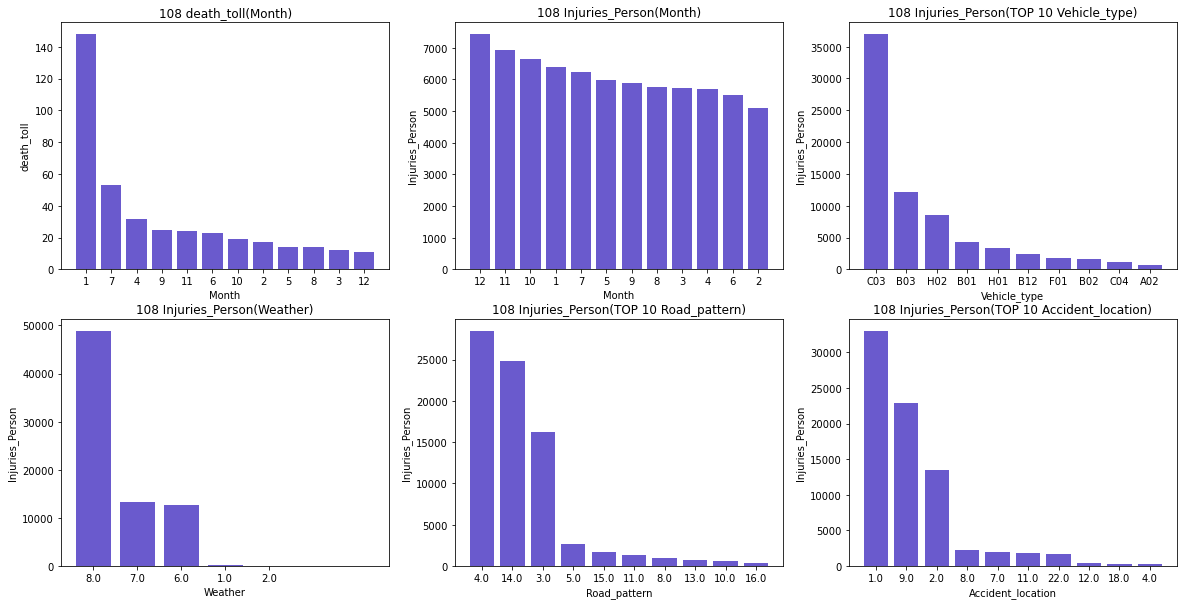

In [4]:
# init variable
dataset_filePath_list = []
dataset_years = []
dateset_folder_path = "./Traffic_accident_dataset/"

# 取出folder裡面的所有file
file_of_folder = os.listdir( dateset_folder_path )

# 取出dataset的年份
for file in file_of_folder:
    dataset_years.append( file[0:3] )
    dataset_filePath_list.append( dateset_folder_path + file ); 

# 生成2*3的格狀長條圖格式
fig_force_year, axes_force_year = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
axes_force_year = axes_force_year.flatten()
# main function
generate_Histogram_picture_force_year(dataset_years, dataset_filePath_list)

## Picture of [Single Topic Dataset] 

In [5]:
def single_picture_data_preprocessing_force_topic(dataset, year, rowName, columnName, pltIndex, isTop10):
    if(isTop10):
        processed_dataset = dataset.groupby(by=[rowName]).sum().sort_values(by=[columnName],ascending=False).head(10).reset_index()
    else:
        processed_dataset = dataset.groupby(by=[rowName]).sum().sort_values(by=[columnName],ascending=False).reset_index()
    plt.sca(axes_force_topic[ pltIndex ]);
    x = np.arange( len(processed_dataset[rowName]) )
    plt.bar( x, processed_dataset[columnName] , color="orange")
    plt.xticks( x, processed_dataset[rowName] )
    plt.xlabel( rowName )
    plt.ylabel( columnName )
    if(isTop10):
        plt.title( year + " " + columnName + "(TOP 10 " + rowName + ")")
    else:
        plt.title( year + " " + columnName + "(" + rowName + ")")

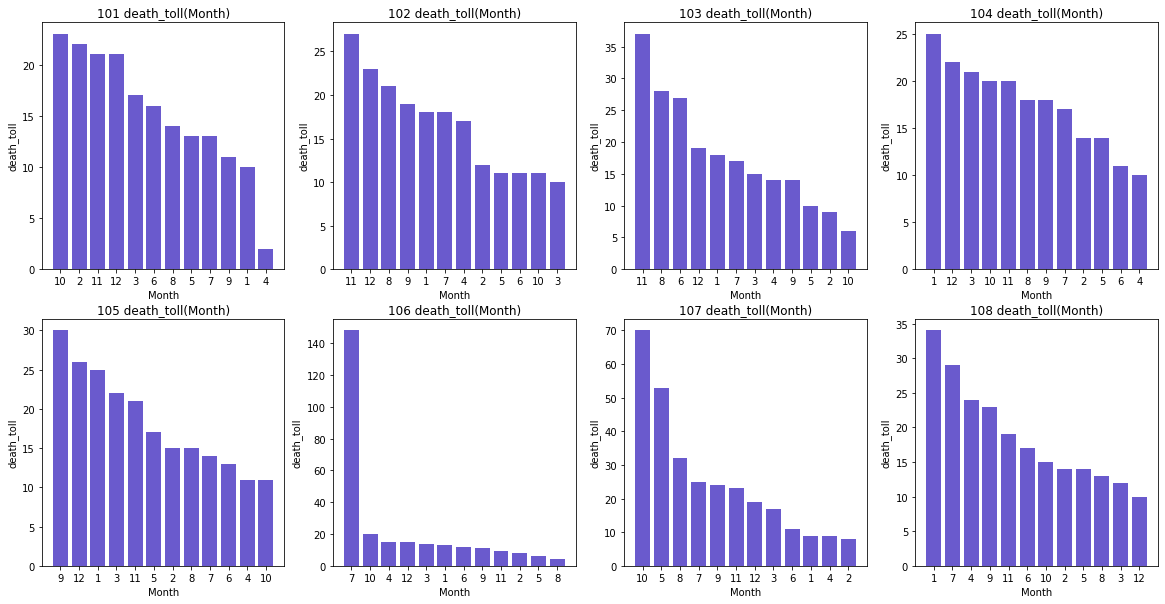

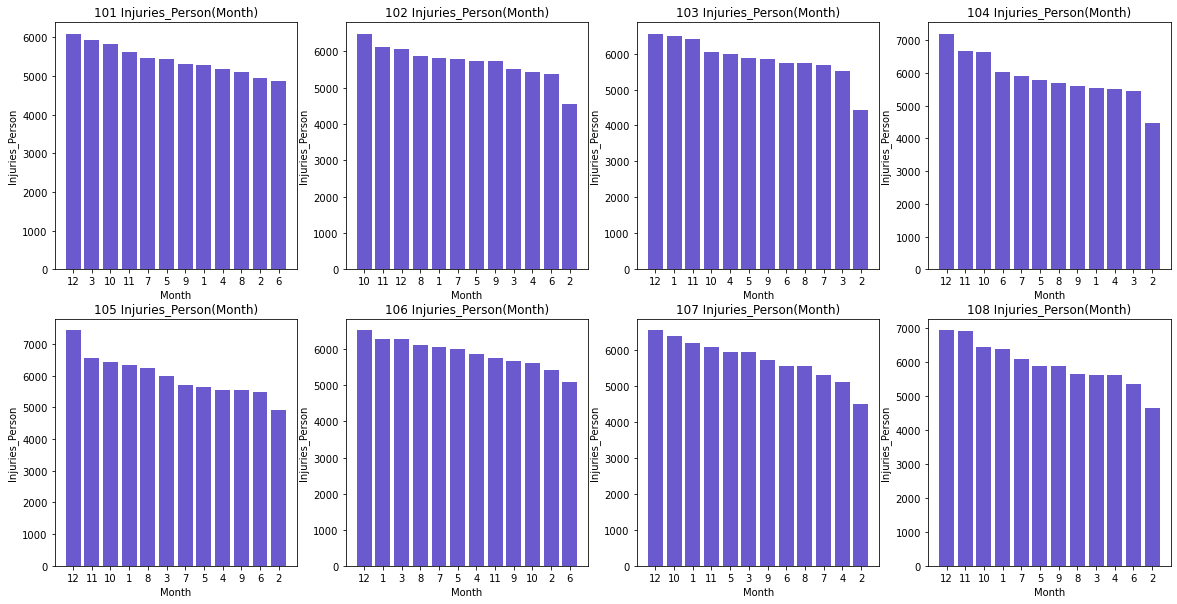

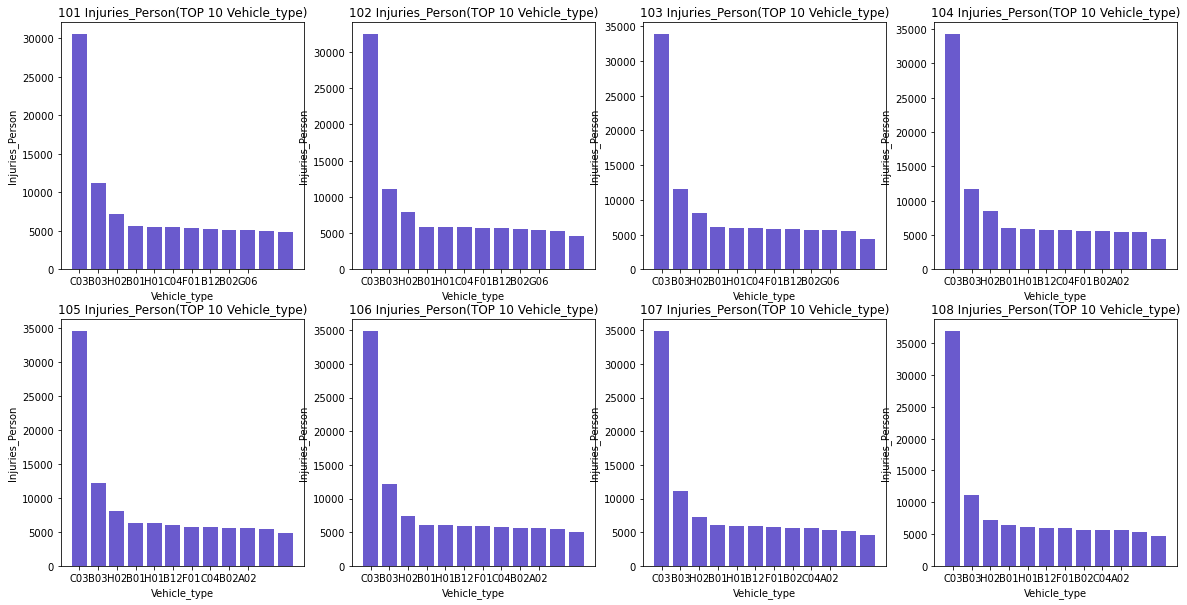

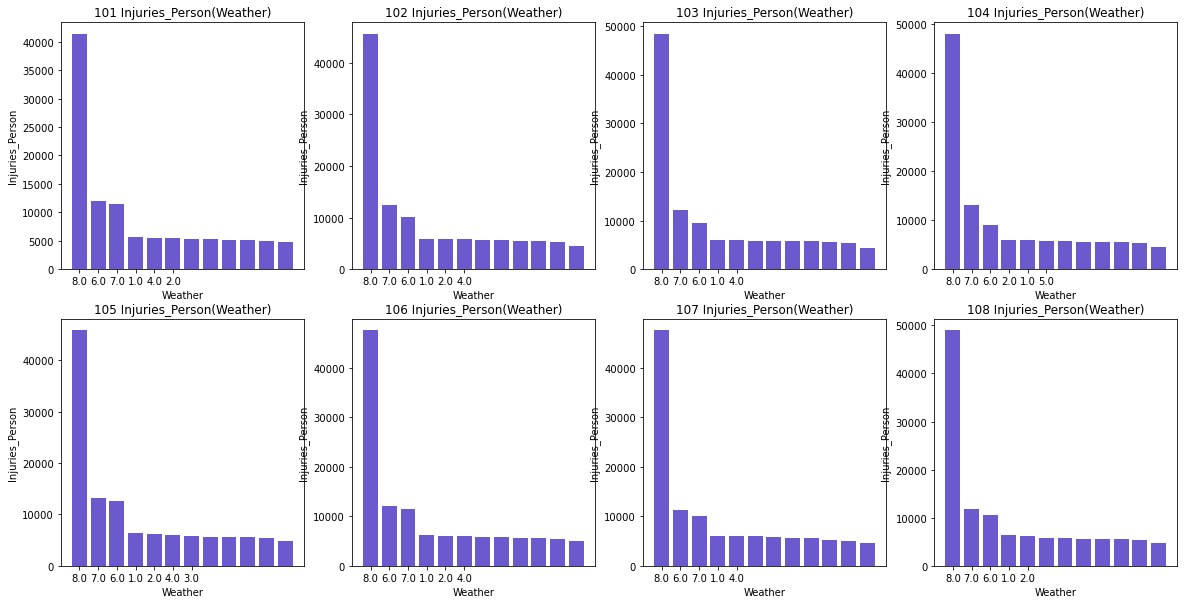

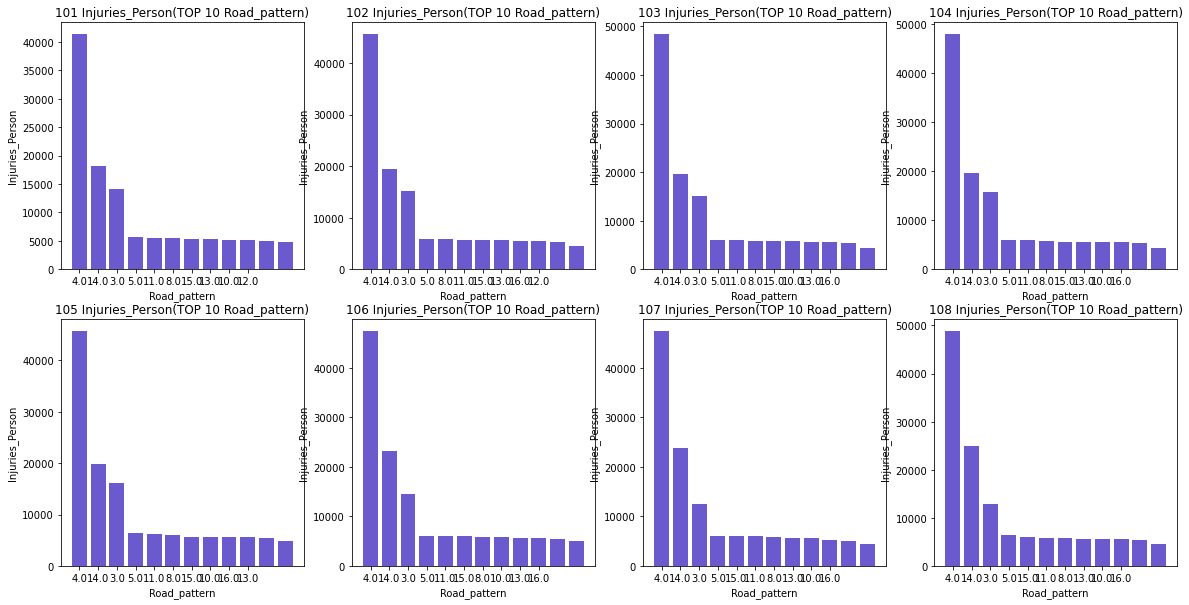

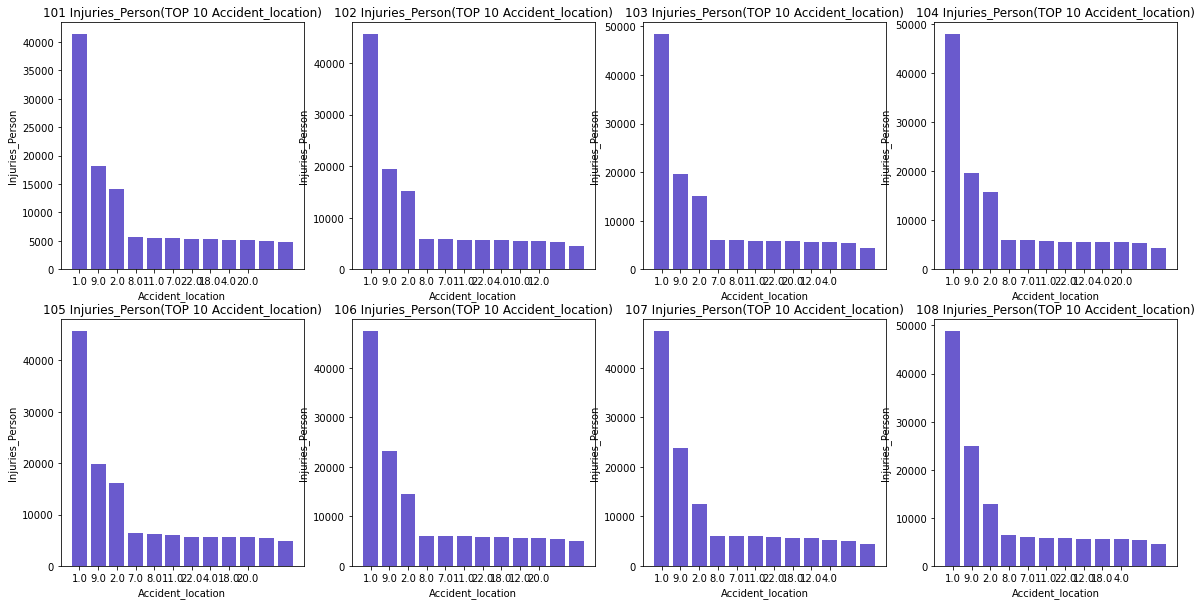

In [6]:
topics = [ ["Month", "death_toll", False], ["Month", "Injuries_Person", False], ["Vehicle_type", "Injuries_Person", True], ["Weather", "Injuries_Person", False], ["Road_pattern", "Injuries_Person", True], ["Accident_location", "Injuries_Person", True]]

# get all csv data into one variable
merge_csv = pd.DataFrame();
dateset_folder_path = "./Traffic_accident_dataset/"
file_of_folder = os.listdir( dateset_folder_path )

for file in file_of_folder:
    file_path = os.path.abspath(dateset_folder_path + file);
    dataframe = pd.read_csv( file_path );
    if(merge_csv.empty == False):
        merge_csv = pd.concat([merge_csv, dataframe], ignore_index=True);
    else:
        merge_csv =  dataframe;

# 生成2*4的格狀長條圖格式       
fig_force_topic, axes_force_topic = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
axes_force_topic = axes_force_topic.flatten()

# for loop to get 6 topic in each year  
for i in range(len(topics)):
    single_picture_data_preprocessing_force_topic( merge_csv[merge_csv['Year'] == 101], "101", topics[i][0], topics[i][1], 0, isTop10=topics[i][2] )
    single_picture_data_preprocessing_force_topic( merge_csv[merge_csv['Year'] == 102], "102", topics[i][0], topics[i][1], 1, isTop10=topics[i][2] )
    single_picture_data_preprocessing_force_topic( merge_csv[merge_csv['Year'] == 103], "103", topics[i][0], topics[i][1], 2, isTop10=topics[i][2] )
    single_picture_data_preprocessing_force_topic( merge_csv[merge_csv['Year'] == 104], "104", topics[i][0], topics[i][1], 3, isTop10=topics[i][2] )
    single_picture_data_preprocessing_force_topic( merge_csv[merge_csv['Year'] == 105], "105", topics[i][0], topics[i][1], 4, isTop10=topics[i][2] )
    single_picture_data_preprocessing_force_topic( merge_csv[merge_csv['Year'] == 106], "106", topics[i][0], topics[i][1], 5, isTop10=topics[i][2] )
    single_picture_data_preprocessing_force_topic( merge_csv[merge_csv['Year'] == 107], "107", topics[i][0], topics[i][1], 6, isTop10=topics[i][2] )
    single_picture_data_preprocessing_force_topic( merge_csv[merge_csv['Year'] == 108], "108", topics[i][0], topics[i][1], 7, isTop10=topics[i][2] )
    plt.show()